# Tensorflow Learning
## www.elecwizard.ir
### chapter 10
#### Looping and Convergence



A key component of most artificial intelligence and machine learning is looping, i.e. the system improving over many iterations of training. A very simple method to train in this way is just to perform updates in a for loop. 

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
from scipy import misc
import tensorflow as tf
import numpy as np
# First, load the image

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [2]:
x = tf.Variable(0, name='x')

model = tf.global_variables_initializer()

with tf.Session() as session:
    for i in range(5):
        session.run(model)
        x = x + 1
        print(session.run(x))



1
2
3
4
5


We can alter this workflow to instead use a variable as the convergence loop, such as in the following:

In [4]:
y = tf.Variable(0., name='y')
threshold = tf.constant(5.)

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    while session.run(tf.less(y, threshold)):
        y = y + 1
        y_value = session.run(y)
        print(y_value)

1.0
2.0
3.0
4.0
5.0


The major change here is that the loop is now a while loop, continuing to loop while the test (using tf.less for a less-than-test) is true. Here, we test if x is less than a given threshold (stored in a constant), and if so, we continue looping.

### Gradient Descent

Any machine learning library must have a gradient descent algorithm. I think it is a law. Regardless, Tensorflow has a few variations on the theme, and they are quite straight forward to use.

Gradient Descent is a learning algorithm that attempts to minimise some error. Which error do you ask? Well that is up to us, although there are a few commonly used methods.

Let’s start with a basic example:

Predicted model: 2.576x + 2.456


/home/reza/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/reza/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


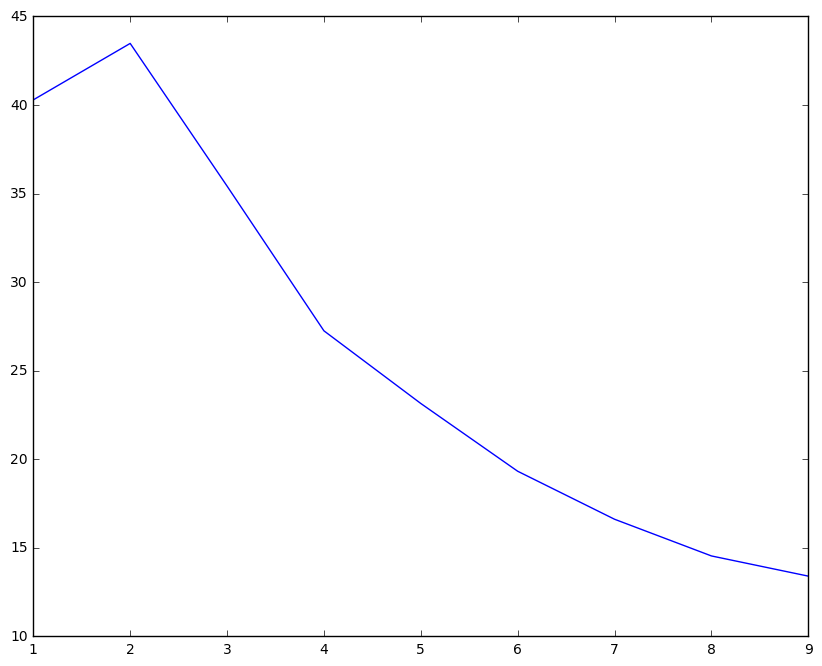

In [11]:
# x and y are placeholders for our training data
x = tf.placeholder("float")
y = tf.placeholder("float")
# w is the variable storing our values. It is initialised with starting "guesses"
# w[0] is the "a" in our equation, w[1] is the "b"
w = tf.Variable([1.0, 2.0], name="w")
# Our model of y = a*x + b
y_model = tf.multiply(x, w[0]) + w[1]

# Our error is defined as the square of the differences
error = tf.square(y - y_model)
# The Gradient Descent Optimizer does the heavy lifting
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

# Normal TensorFlow - initialize values, create a session and run the model
model = tf.global_variables_initializer()

errors = []
with tf.Session() as session:
    session.run(model)
    for i in range(10):
        x_train = tf.random_normal((1,), mean=5, stddev=2.0)
        y_train = x_train * 2 + 6
        x_value, y_value = session.run([x_train, y_train])
        _, error_value = session.run([train_op, error], feed_dict={x: x_value, y: y_value})
        errors.append(error_value)
    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))

import matplotlib.pyplot as plt
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()


The major line of interest here is    

train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)      

where the training step is defined. It aims to minimise the value of the error Variable, which is defined earlier as the square of the differences (a common error function). The 0.01 is the step it takes to try learn a better value.

An important note here is that we are optimising just a single value, but that value can be an array. This is why we used w as the Variable, and not two separate Variables a and b.

You may have noticed that I take a windowed average here – using np.mean(errors[i-50:i]) instead of just using errors[i]. The reason for this is that we are only doing a single test inside the loop, so while the error tends to decrease, it bounces around quite a bit. Taking this windowed average smooths this out a bit, but as you can see above, it still jumps around.
